## Logistic Regression with Keras

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

import tensorflow as tf
# We'll be explicitly naming the atrributes/classes of everything so we can get a feel for the package landscape & where everything is

In [51]:
cali = fetch_california_housing()
X = pd.DataFrame(cali['data'], columns=cali['feature_names'])
y = pd.DataFrame(cali['target'], columns=cali['target_names'])

In [52]:
# We have to make this a classification problem now
# Assign labels to house price, 'high' (1) or 'low' (0) based on 50th percentile (mean) as threshold
mu_val = np.mean(y)
y_bin = pd.DataFrame([1 if i > mu_val else 0 for i in y.values])

In [53]:
np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2)
np.mean(y_train) # Good split; 

0.4089752906976744

In [70]:
# Test a null classifier; random guesses
null_model = np.random.randint(0, 2, len(y_test))
c = 0
for i in null_model:
    if null_model[i] == y_test.values[i]:
        c+=1
null_acc = c/len(y_test)
null_acc # Null accuracy is about 50%

0.502422480620155

In [54]:
def LinearModel(input_dim=8):
    input_layer = tf.keras.layers.Input(shape=(input_dim,))
    linear = tf.keras.layers.Dense(units=1, activation='sigmoid')(input_layer)
    return tf.keras.Model(inputs=input_layer, outputs=linear)

In [55]:
lm = LinearModel()
lm.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [56]:
lm.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
loss = lm.fit(X_train, y_train, validation_data=(X_test, y_test) ,epochs=100, batch_size=256)

Epoch 1/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5917 - loss: 305.5345 - val_accuracy: 0.6047 - val_loss: 268.5800
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5899 - loss: 264.3978 - val_accuracy: 0.6051 - val_loss: 227.3190
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5934 - loss: 226.6406 - val_accuracy: 0.6013 - val_loss: 186.4220
Epoch 4/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - accuracy: 0.5883 - loss: 184.7529 - val_accuracy: 0.6000 - val_loss: 145.6626
Epoch 5/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.5804 - loss: 142.9307 - val_accuracy: 0.5950 - val_loss: 105.4262
Epoch 6/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.5819 - loss: 100.2700 - val_accuracy: 0.5865 - val_loss: 65.9174
Epoch 7/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.5751 - loss: 58.0769 - val_accuracy: 0.5736 - val_loss: 31.7187
Epoch 8/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.5543 - loss

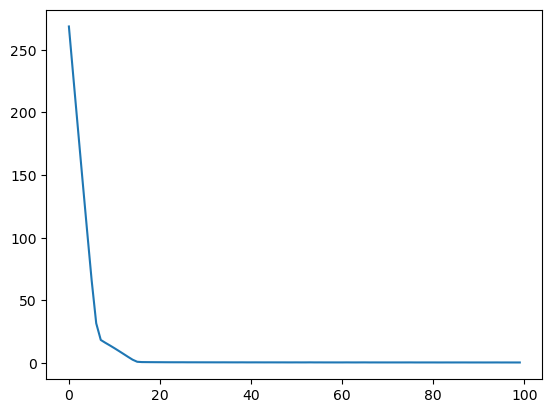

In [57]:
plt.plot(loss.history['val_loss'])

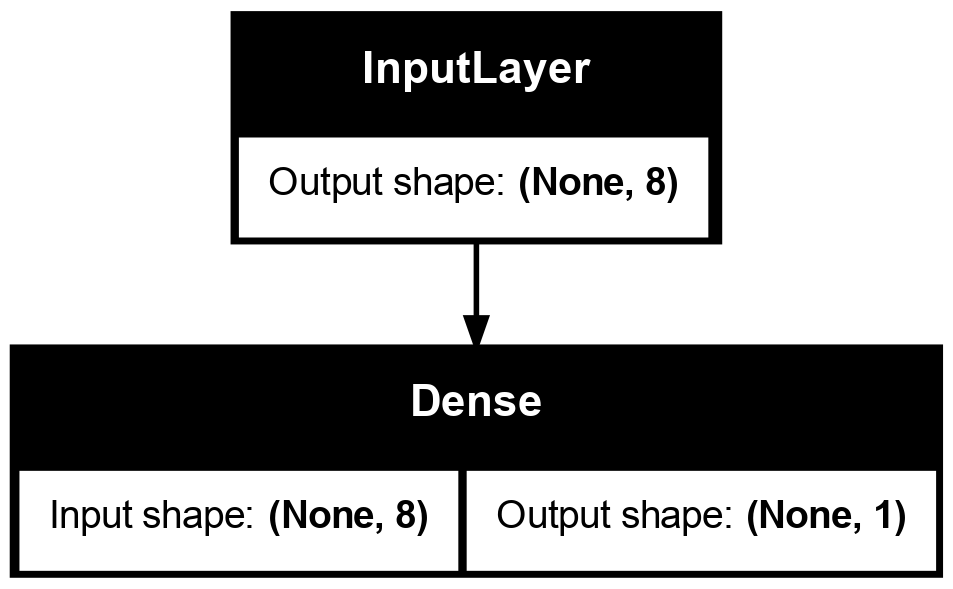

In [58]:
# Plot model
dot_img_file = 'logisticModel.png'
tf.keras.utils.plot_model(lm, to_file=dot_img_file, show_shapes=True)